###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2024 Semester 1

## Assignment 1: Wine quality classification with K-NN


**Student ID(s):**     `1356056`


This iPython notebook is a template which you will use for your Assignment 1 submission.

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

**Adding proper comments to your code is MANDATORY. **

## 1. K-NN classifier

In [25]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


wine_train = np.genfromtxt('COMP30027_2024_asst1_data/winequality-train.csv', delimiter=',', skip_header=1)
wine_test = np.genfromtxt('COMP30027_2024_asst1_data/winequality-test.csv', delimiter=',', skip_header=1)

attribute_names = ["fixedAcidity","volatileAcidity","citricAcid","residualSugar","chlorides","freeSulfurDioxide","totalSulfurDioxide","density","pH","sulphates","alcohol"]

# Extract features (X) and labels (Y)
train_X = wine_train[:, :-1]
train_Y = wine_train[:, -1]
train_Y = train_Y.astype(int)

test_X = wine_test[:, :-1]
test_Y = wine_test[:, -1]

def euclideanDistance(train, test):
    return np.sqrt(np.sum((train - test)**2))


def knnClassifier(train_X, train_Y, test_X, k):
    test_Y = []
    for test_row in test_X:
        #Computing euclidean distances for each point
        distances = []
        for train_row in train_X:
            distances.append(euclideanDistance(train_row, test_row))

        #Finding the k closest rows that are closest to the test row
        index_of_closest = np.argsort(distances)
        labels_of_closest = []
        for i in range(k):
            labels_of_closest.append(train_Y[index_of_closest[i]])

        #Counting labels of k closest neighbours
        max_count = 0

        majority_label = None
        for label in set(labels_of_closest):
            count = sum(1 for x in labels_of_closest if x == label)
            if count > max_count:
                max_count = count
                majority_label = label
            elif count == max_count and count > 1:
                majority_label = labels_of_closest[0]
        test_Y.append(majority_label)
    return test_Y

num_class_0 = np.sum(train_Y == 0)
num_class_1 = np.sum(train_Y == 1)

print(f"Number of instances for Class 0: {num_class_0}")
print(f"Number of instances for Class 1: {num_class_1}")

num_class_0t = np.sum(test_Y == 0)
num_class_1t = np.sum(test_Y == 1)

print(f"Number of instances for Class 0: {num_class_0t}")
print(f"Number of instances for Class 1: {num_class_1t}")



Number of instances for Class 0: 820
Number of instances for Class 1: 530
Number of instances for Class 0: 820
Number of instances for Class 1: 530


## 2. 1-NN classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

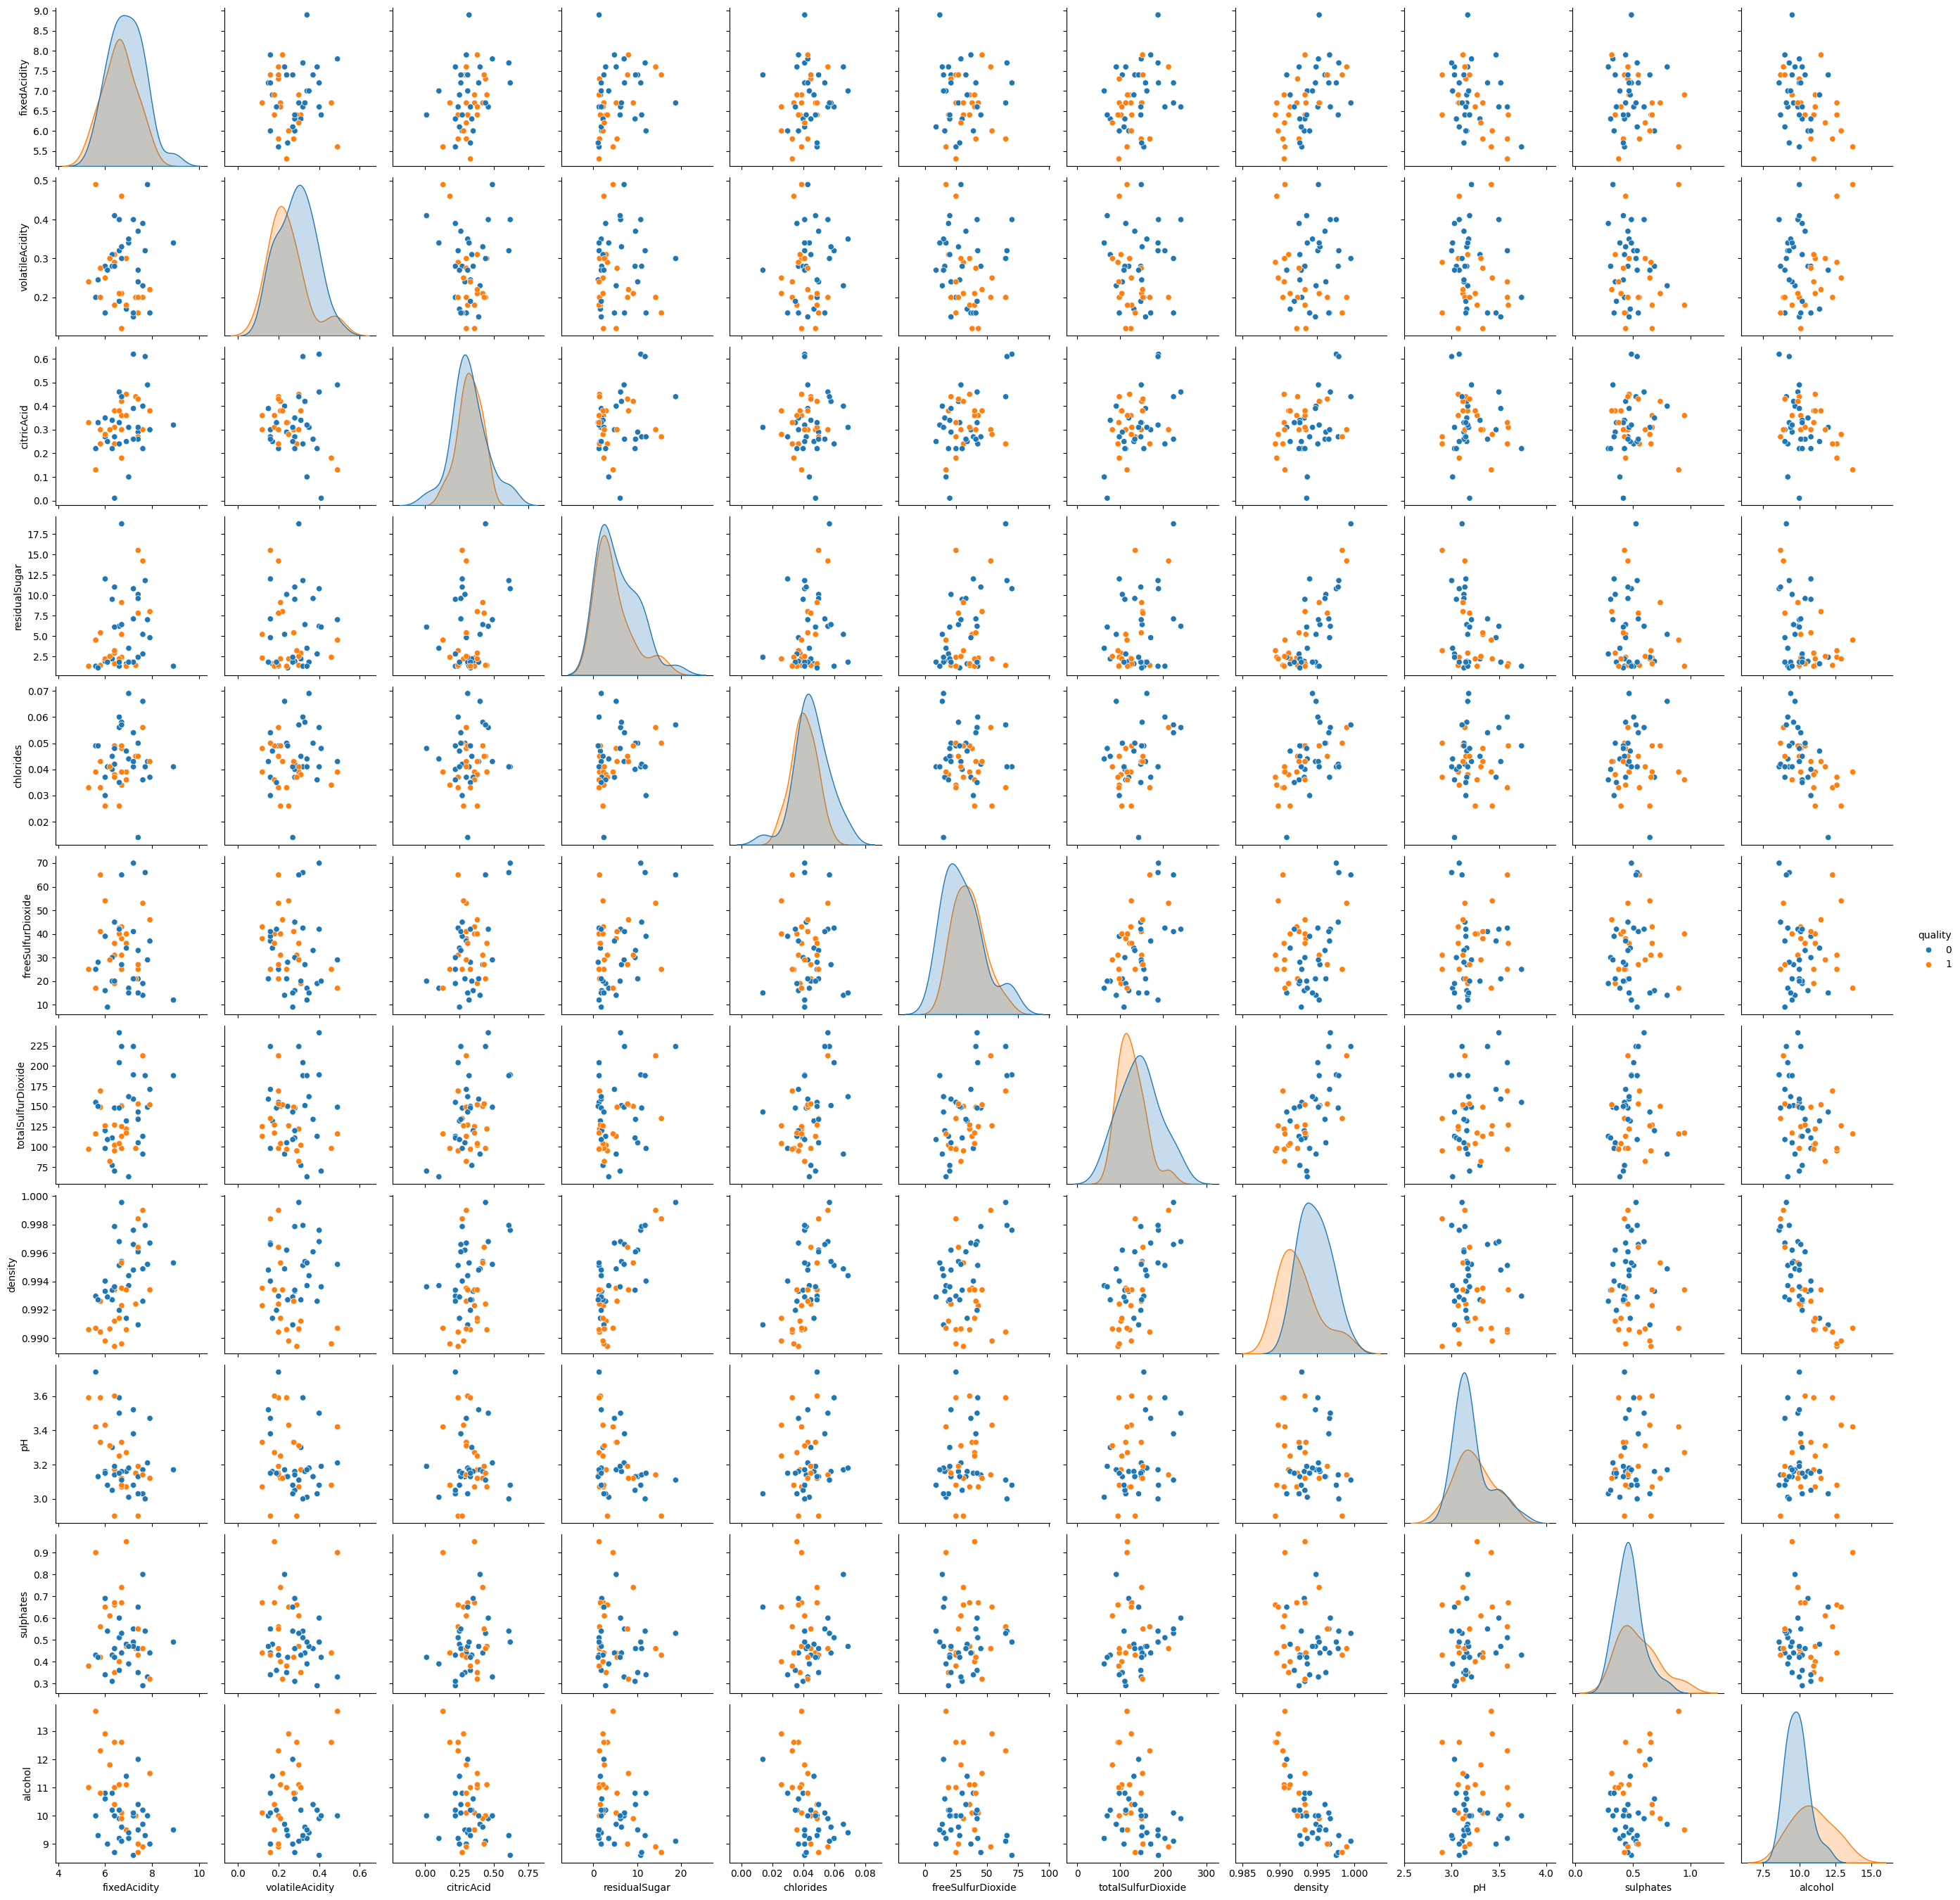

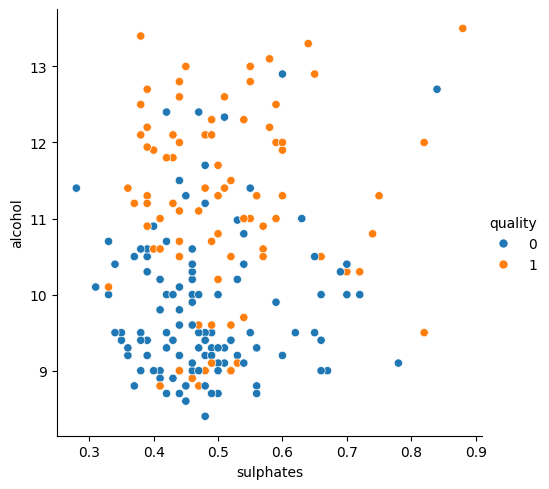

In [22]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# get the data to plot
train = pd.read_csv('COMP30027_2024_asst1_data/winequality-train.csv')
sample = train.sample(200)


# create pairplot to visualize the data
q2_pairplot = sns.pairplot(train.sample(50), hue='quality')
q2_pairplot.savefig('q2_pairplot.png')

# chose alcohol and sulphates as the features to plot
sns.relplot(x='sulphates', y='alcohol', hue='quality', data=sample)

## 3. Normalization

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

## 4. Model extensions

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### 4.1
Compare the performance of your best 1-NN model from Question 3 to a Gaussian naive Bayes model on this dataset (you may use library functions to implement the Gaussian naive Bayes model). In your write-up, state the accuracy of the naive Bayes model and identify instances where the two models disagree. Why do the two models classify these instances differently?

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from scipy.stats import norm


class_priors = np.bincount(train_Y) / len(train_Y)
class_means = np.array([train_X[train_Y == i].mean(axis=0) for i in np.unique(train_Y)])
class_vars = np.array([train_X[train_Y == i].var(axis=0) for i in np.unique(train_Y)])

def normalDistribution(x, mean, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-(1 / (2 * var)) * ((x - mean) ** 2))


def gaussianNaiiveBayes(test_X):

    predictions = []
    for x in test_X:
        posteriors = []
        for i in range(len(class_priors)):
            likelihoods = normalDistribution(x, class_means[i], class_vars[i])
            log_likelihoods = np.log(likelihoods)
            posterior = np.log(class_priors[i]) + np.sum(log_likelihoods)
            posteriors.append(posterior)
        predictions.append(np.argmax(posteriors))

    return predictions

def computeAccuracy(prediction, actual):
    number_correct = 0
    for i in range(len(prediction)):
        if prediction[i] == actual[i]:
            number_correct += 1
    return number_correct / len(prediction)


clf = GaussianNB()
clf.fit(train_X, train_Y)

predsk = clf.predict(test_X)
pred = gaussianNaiiveBayes(test_X)
accurac = accuracy_score(test_Y, predsk)
accuracy = accuracy_score(test_Y, pred)
precision = precision_score(test_Y, pred)
recall = recall_score(test_Y, pred)
f1 = f1_score(test_Y, pred)
cm = confusion_matrix(test_Y, pred)
print(cm)
print(precision)
print(recall)
print(f1)
print(accuracy)




[[607 213]
 [ 92 438]]
0.6728110599078341
0.8264150943396227
0.7417442845046571
0.774074074074074


Cases where GNB was wrong and 1-NN was right:
{'index': 0, 'features': array([8.100e+00, 2.700e-01, 4.100e-01, 1.450e+00, 3.300e-02, 1.100e+01,
       6.300e+01, 9.908e-01, 2.990e+00, 5.600e-01, 1.200e+01]), 'true_label': 0.0, 'gnb_prediction': 1, 'knn_prediction': 0}
{'index': 27, 'features': array([7.40e+00, 3.90e-01, 2.30e-01, 7.00e+00, 3.30e-02, 2.90e+01,
       1.26e+02, 9.94e-01, 3.14e+00, 4.20e-01, 1.05e+01]), 'true_label': 0.0, 'gnb_prediction': 1, 'knn_prediction': 0}
{'index': 29, 'features': array([6.500e+00, 2.400e-01, 3.200e-01, 7.600e+00, 3.800e-02, 4.800e+01,
       2.030e+02, 9.958e-01, 3.450e+00, 5.400e-01, 9.700e+00]), 'true_label': 1.0, 'gnb_prediction': 0, 'knn_prediction': 1}
{'index': 38, 'features': array([6.300e+00, 3.600e-01, 3.000e-01, 4.800e+00, 4.900e-02, 1.400e+01,
       8.500e+01, 9.932e-01, 3.280e+00, 3.900e-01, 1.060e+01]), 'true_label': 0.0, 'gnb_prediction': 1, 'knn_prediction': 0}
{'index': 57, 'features': array([7.500e+00, 2.700e-01, 3.600e-01, 7.00

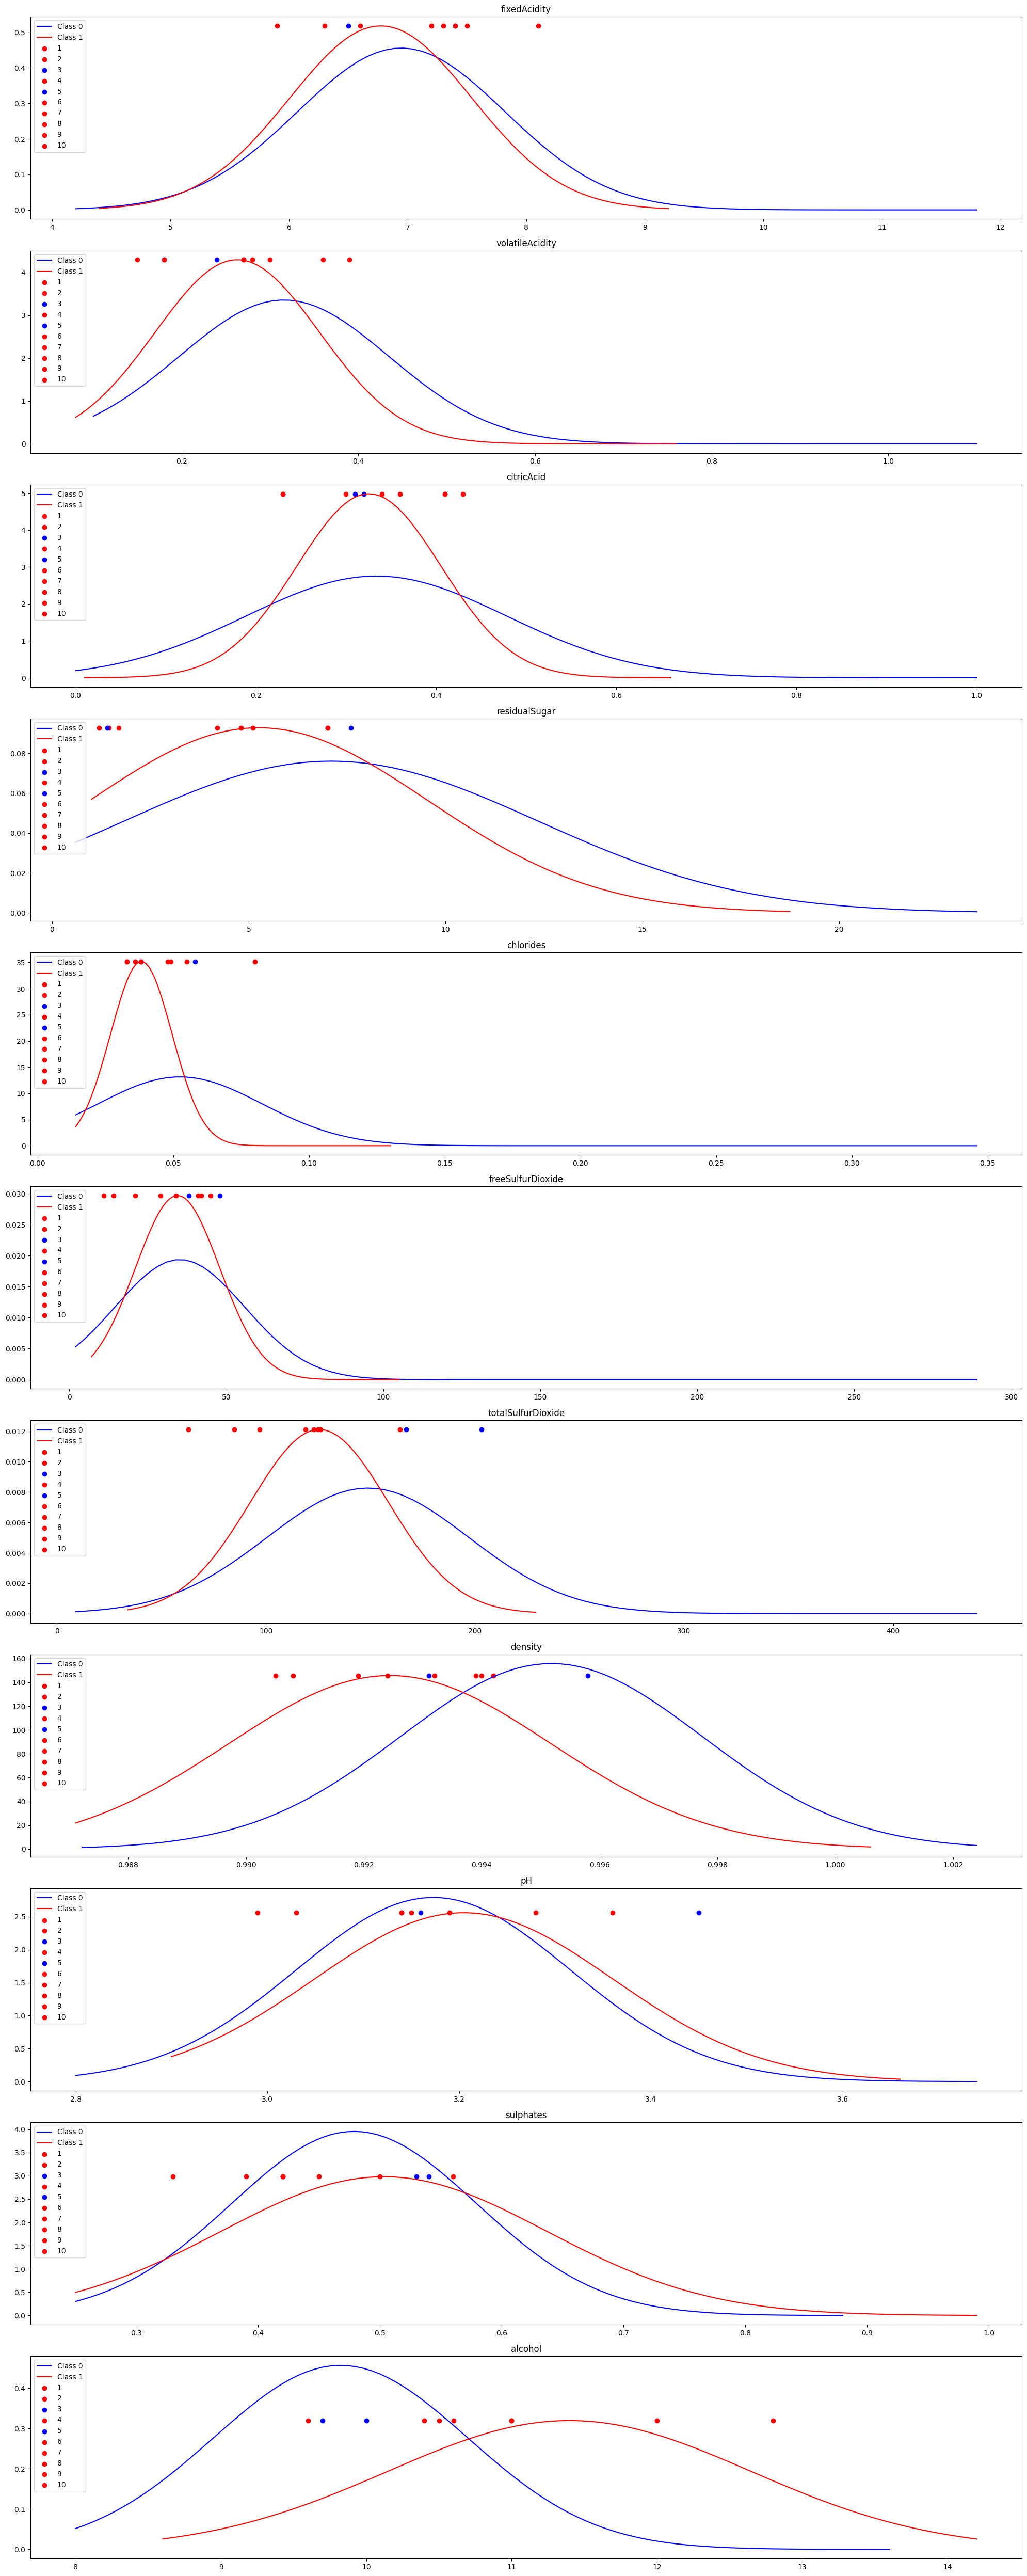

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np


# Assuming train_X and test_X are your training and test datasets
gnb = GaussianNB()
gnb.fit(train_X, train_Y)
gnb_preds = gnb.predict(test_X)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_Y)
knn_preds = knn.predict(test_X)

gnb_wrong_knn_right = []
knn_wrong_gnb_right = []

for i in range(len(test_Y)):
    if gnb_preds[i] != test_Y[i] and knn_preds[i] == test_Y[i]:
        gnb_wrong_knn_right.append({
            'index': i,
            'features': test_X[i],
            'true_label': test_Y[i],
            'gnb_prediction': gnb_preds[i],
            'knn_prediction': knn_preds[i]
        })
    elif gnb_preds[i] == test_Y[i] and knn_preds[i] != test_Y[i]:
        knn_wrong_gnb_right.append({
            'index': i,
            'features': test_X[i],
            'true_label': test_Y[i],
            'gnb_prediction': gnb_preds[i],
            'knn_prediction': knn_preds[i]
        })

# Sort cases where GNB was wrong and 1-NN was right
gnb_wrong_knn_right_sorted = sorted(gnb_wrong_knn_right, key=lambda x: x['index'])

# Sort cases where 1-NN was wrong and GNB was right
knn_wrong_gnb_right_sorted = sorted(knn_wrong_gnb_right, key=lambda x: x['index'])

# Print information about the first few cases in each sorted list
print("Cases where GNB was wrong and 1-NN was right:")
for i in range(min(5, len(gnb_wrong_knn_right_sorted))):
    print(gnb_wrong_knn_right_sorted[i])

print("\nCases where 1-NN was wrong and GNB was right:")
for i in range(min(5, len(knn_wrong_gnb_right_sorted))):
    print(knn_wrong_gnb_right_sorted[i])

def printPlots():
    class_0 = train_X[train_Y == 0]
    class_1 = train_X[train_Y == 1]

    mean_0 = class_means[0]
    mean_1 = class_means[1]

    var_0 = class_vars[0]
    var_1 = class_vars[1]

    fig, axs = plt.subplots(train_X.shape[1], 2, figsize=(20, 50))

    for i in range(train_X.shape[1]):
        # Plot the Gaussian curve for class 1
        x = np.linspace(class_0[:, i].min(), class_0[:, i].max(), 100)
        pdf_0 = norm.pdf(x, mean_0[i], np.sqrt(var_0[i]))
        axs[i, 0].plot(x, pdf_0, color='blue', label='Class 0')

        # Plot the Gaussian curve for class 2
        x = np.linspace(class_1[:, i].min(), class_1[:, i].max(), 100)
        pdf_1 = norm.pdf(x, mean_1[i], np.sqrt(var_1[i]))
        axs[i, 0].plot(x, pdf_1, color='red', label='Class 1')

        # Plot up to 10 points where GNB predictions are wrong
        for j, index in enumerate(wrong_indices[:10]):
            color = 'red' if gnb_preds[index] == 1 else 'blue'
            axs[i, 0].scatter(test_X[index, i], pdf_1.max(), color=color, label=f'{j+1}')

        axs[i, 0].set_title(attribute_names[i])
        axs[i, 0].legend(loc='upper left')

        # Plot histogram
        axs[i, 1].hist(train_X[:, i], bins=20, color='skyblue', alpha=0.7, label='Class 0')
        axs[i, 1].hist(train_X[:, i][train_Y == 1], bins=20, color='salmon', alpha=0.7, label='Class 1')
        axs[i, 1].set_title(f'{attribute_names[i]} Histogram')
        axs[i, 1].legend()

    plt.tight_layout()
    plt.show()


printPlots()





### 4.2
Implement two additional distance measures for your K-NN model: cosine similarity and Mahalanobis distance (you may use library functions for these distance measures). Do 1-NN classification using each of these new distance measures and the three normalization options from Question 3. Discuss how the new distance metrics compare to Euclidean distance and how each metric is affected by normalization.

### 4.3
Implement either of the two K-NN weighting strategies discussed in lecture (inverse linear distance or inverse distance). Compare the performance of the weighted and majority vote models for a few different values of K. In your write-up, discuss how weighting strategy and the value of K affect the model's decisions.

### 4.4
Measure the empirical distribution of class labels in the training dataset (what percentage of the training data comes from each class). Then evaluate the distribution of labels predicted by your K-NN model for the test data, for a range of values for K. Does the class distribution of the predicted labels match the class distribution of the training data? Explain why or why not.